In [1]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("Netflix_shows_movies.csv")

# Step 3: Show the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
df.isnull().sum()


show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
# Fill missing values

# Fill missing directors with "Unknown"
df['director'] = df['director'].fillna('Unknown')

# Fill missing cast with "Not Available"
df['cast'] = df['cast'].fillna('Not Available')

# Fill missing country with "Unknown"
df['country'] = df['country'].fillna('Unknown')

# Drop rows where 'date_added' is missing
df = df.dropna(subset=['date_added'])

# Fill missing ratings with "Not Rated"
df['rating'] = df['rating'].fillna('Not Rated')


In [9]:
# Recheck if any missing values are left
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [11]:
df['type'].value_counts()

type
Movie      4264
TV Show    1959
Name: count, dtype: int64

In [13]:
df['country'].value_counts().head(10)

country
United States     2026
India              777
Unknown            474
United Kingdom     347
Japan              175
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Name: count, dtype: int64

In [17]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Index: 6223 entries, 0 to 6222
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6223 non-null   int64 
 1   type          6223 non-null   object
 2   title         6223 non-null   object
 3   director      6223 non-null   object
 4   cast          6223 non-null   object
 5   country       6223 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6223 non-null   int64 
 8   rating        6223 non-null   object
 9   duration      6223 non-null   object
 10  listed_in     6223 non-null   object
 11  description   6223 non-null   object
dtypes: int64(2), object(10)
memory usage: 632.0+ KB
None
             show_id   type        title director           cast  \
count   6.223000e+03   6223         6223     6223           6223   
unique           NaN      2         6162     3302           5460   
top              NaN  Movie  The Silence  Unknow

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

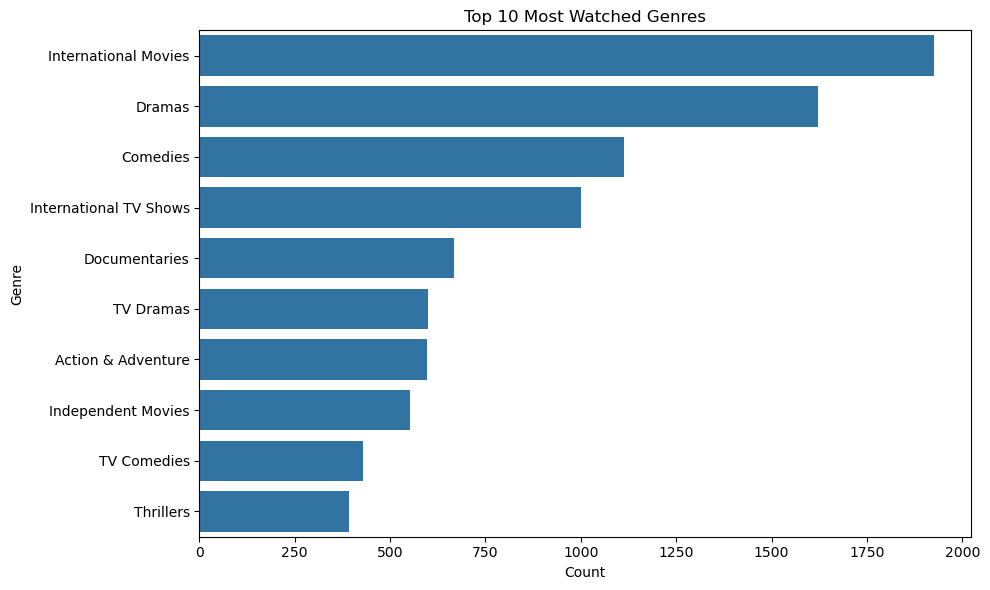

In [21]:
# Split multiple genres
from collections import Counter

genre_series = df['listed_in'].str.split(', ')
genre_flat = [genre for sublist in genre_series for genre in sublist]
genre_counts = Counter(genre_flat)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Genre', data=genre_df.head(10))
plt.title('Top 10 Most Watched Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


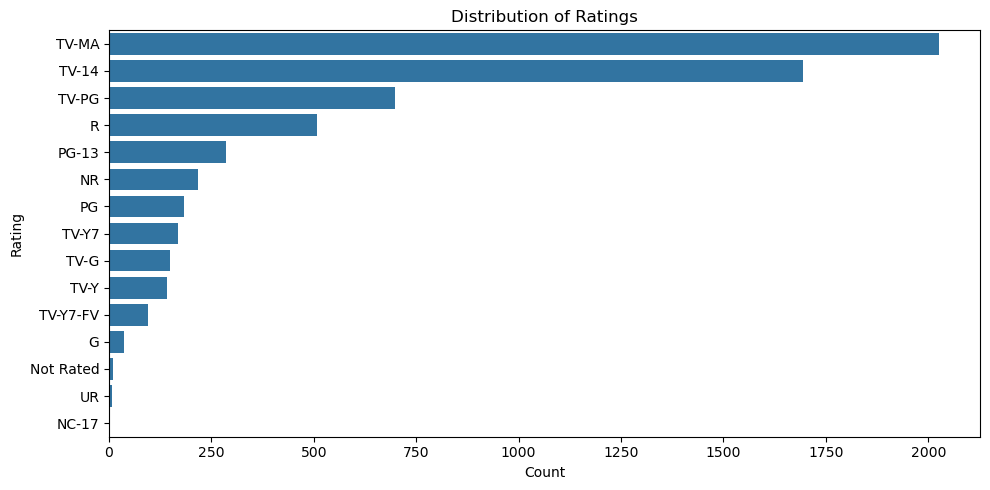

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()
